In [1]:
import sys
!{sys.executable} -m pip install bm3d

import numpy as np
import skimage.io
import matplotlib.pyplot as plt
from bm3d import bm3d 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 862.0/862.0 kB 4.6 MB/s eta 0:00:004.7 MB/s eta 0:00:01

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip


In [2]:
# Utils

# Importer une image
def import_image(filename):
    image = ski.io.imread(filename)
    return np.array(image)

# Afficher une image
def display_image(image, title):
    plt.figure()
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Calculer le PSNR entre deux images
def psnr(original_image, processed_image):
    original_image = original_image.astype(np.float64)
    processed_image = processed_image.astype(np.float64)
    mse = np.mean((original_image - processed_image) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr_value = 10 * np.log10((max_pixel ** 2) / mse)
    return psnr_value

    # Fonction pour afficher une image et calculer le PSNR
def display_and_psnr(original, processed, title):
    psnr_value = psnr(original * 255, processed * 255)
    print(f"{title} - PSNR : {psnr_value:.2f}")
    display_image(processed, title)


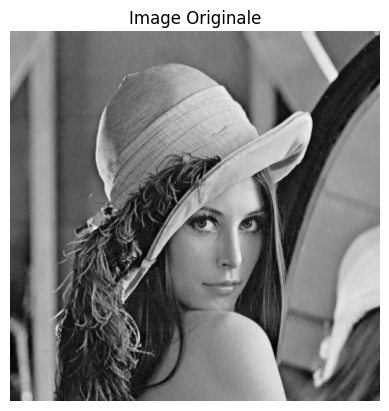

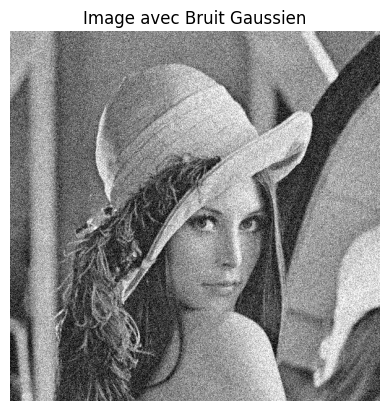

Image bruitée - PSNR : 20.10

Testing BM3D with sigma_psd = 0.1


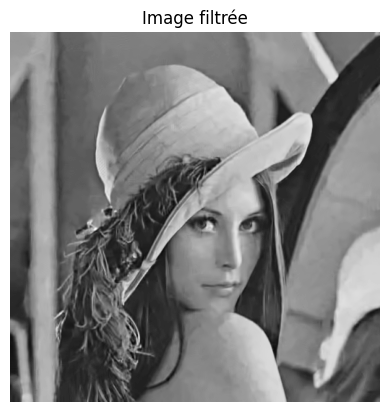

PSNR avec sigma_psd=0.1 : 31.85

Testing BM3D with sigma_psd = 0.5


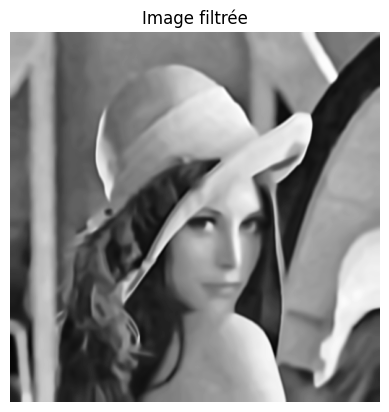

PSNR avec sigma_psd=0.5 : 27.63

Testing BM3D with sigma_psd = 1


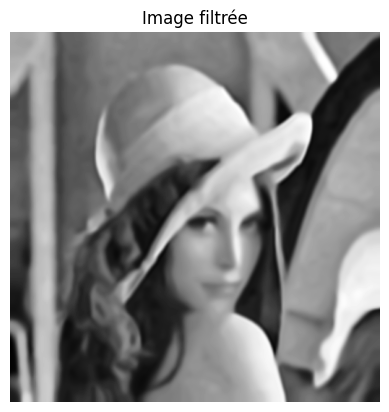

PSNR avec sigma_psd=1 : 26.09

Testing BM3D with sigma_psd = 2


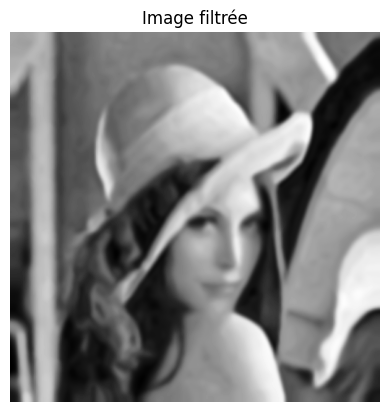

PSNR avec sigma_psd=2 : 24.78

Testing BM3D with sigma_psd = 3


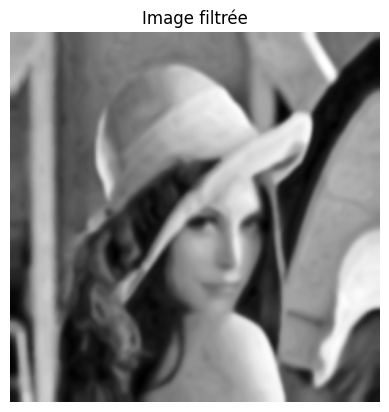

PSNR avec sigma_psd=3 : 23.14


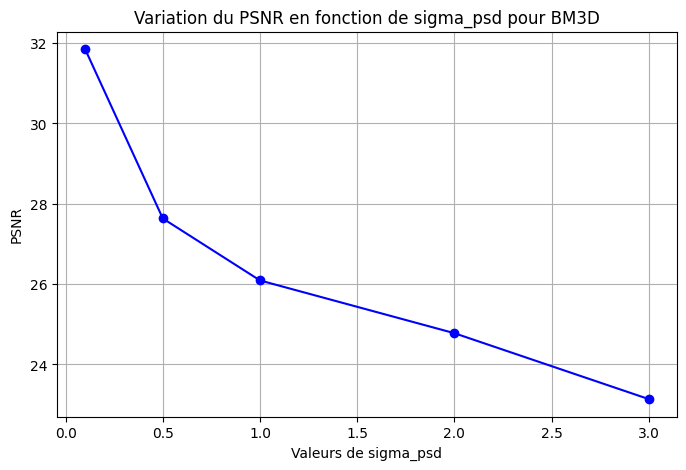

In [4]:
import numpy as np
import skimage.io
import matplotlib.pyplot as plt
from bm3d import bm3d

# Fonction pour afficher une image et calculer le PSNR
def display_image(image, title):
    plt.figure()
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Calculer le PSNR entre deux images
def psnr(original_image, processed_image):
    original_image = original_image.astype(np.float64)
    processed_image = processed_image.astype(np.float64)
    mse = np.mean((original_image - processed_image) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr_value = 10 * np.log10((max_pixel ** 2) / mse)
    return psnr_value

# Charger l'image d'origine et ajouter du bruit
image = skimage.io.imread("lena.ppm", as_gray=True) / 255.0
display_image(image, "Image Originale")

noise_variance = 0.01
image_noised = image + np.random.normal(0, np.sqrt(noise_variance), image.shape)
image_noised = np.clip(image_noised, 0, 1)
display_image(image_noised, "Image avec Bruit Gaussien")

# Calculer le PSNR de l'image bruitée
psnr_noised = psnr(image * 255, image_noised * 255)
print(f"Image bruitée - PSNR : {psnr_noised:.2f}")

# Liste de valeurs de sigma_psd pour BM3D et tableau des PSNR
sigma_psd_values = [0.1, 0.5, 1, 2, 3]
psnr_values = []

# Appliquer le filtre BM3D pour chaque sigma_psd
for sigma_psd in sigma_psd_values:
    print(f"\nTesting BM3D with sigma_psd = {sigma_psd}")
    image_filtree = bm3d(image_noised, sigma_psd)
    display_image(image_filtree, "Image filtrée")
    psnr_val = psnr(image * 255, image_filtree * 255)
    psnr_values.append(psnr_val)
    print(f"PSNR avec sigma_psd={sigma_psd} : {psnr_val:.2f}")

# Tracer la courbe PSNR vs sigma_psd
plt.figure(figsize=(8, 5))
plt.plot(sigma_psd_values, psnr_values, marker='o', linestyle='-', color='b')
plt.xlabel("Valeurs de sigma_psd")
plt.ylabel("PSNR")
plt.title("Variation du PSNR en fonction de sigma_psd pour BM3D")
plt.grid()
plt.show()
